In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loading and Visualising the Pandas Data Frame

In [2]:
data = pd.read_csv('full.csv', header = None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
data.describe()

,0,4,5,6,7,8,9,10,11,12,...,31,32,33,34,35,36,37,38,39,40
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Data Preprocessing (Checking for NULL values)

In [4]:
print(data.isnull().sum(axis = 0))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64


## Data Preprocessing (Handling categorical Data)

In [5]:
Dict = {}

In [6]:
for i in range(42):
    if data[i].unique().dtype == object:
        Dict[i] = {}
        unique_vals = data[i].unique()
        c = 0
        for v in unique_vals:
            Dict[i][v] = c
            c = c + 1
        data[i] = data[i].map(Dict[i])

### Handling categorical labels(this mapping is used throughout the notebook to perform analysis)

In [7]:
Dict[41]

{'normal.': 0,
 'buffer_overflow.': 1,
 'loadmodule.': 2,
 'perl.': 3,
 'neptune.': 4,
 'smurf.': 5,
 'guess_passwd.': 6,
 'pod.': 7,
 'teardrop.': 8,
 'portsweep.': 9,
 'ipsweep.': 10,
 'land.': 11,
 'ftp_write.': 12,
 'back.': 13,
 'imap.': 14,
 'satan.': 15,
 'phf.': 16,
 'nmap.': 17,
 'multihop.': 18,
 'warezmaster.': 19,
 'warezclient.': 20,
 'spy.': 21,
 'rootkit.': 22}

In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.196583e+00,8.603970e+00,1.539899e+00,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,...,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02,3.855152e+00
std,7.233298e+02,9.600480e-01,4.942303e+00,2.805540e+00,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,...,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01,2.107891e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
75%,0.000000e+00,2.000000e+00,1.000000e+01,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
max,5.832900e+04,2.000000e+00,6.900000e+01,1.000000e+01,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,...,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.200000e+01


In [9]:
print(data[2].mode())

0    9
dtype: int64


## Data Preprocessing(Checking for skewness and perform re-sampling)

In [10]:
cs = data[41].value_counts()
cs

5     2807886
4     1072017
0      972781
15      15892
10      12481
9       10413
17       2316
13       2203
20       1020
8         979
7         264
6          53
1          30
11         21
19         20
14         12
22         10
2           9
12          8
18          7
16          4
3           3
21          2
Name: 41, dtype: int64

In [11]:
cs = data[41].value_counts()
sample_count = 10000
classes = []
for i in range(23):
    df = data[data[41] == i]
    if cs[i] >= 100000:
        df = df.sample(100000)
    else:
        df = df.sample(100000, replace = True)
    classes.append(df)

data_sampled = pd.concat(classes, axis=0)

In [12]:
cs = data_sampled[41].value_counts()
cs

22    100000
10    100000
1     100000
2     100000
3     100000
4     100000
5     100000
6     100000
7     100000
8     100000
9     100000
11    100000
21    100000
12    100000
13    100000
14    100000
15    100000
16    100000
17    100000
18    100000
19    100000
20    100000
0     100000
Name: 41, dtype: int64

## Load Resampled data as numpy arrays for training

In [13]:
data_np = (data.to_numpy()).astype(np.float)
y_train = data_np[:, 41]
X_train = data_np[:, 0:41]
print(X_train.shape)
print(y_train.shape)

(4898431, 41)
(4898431,)


# Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150).fit(X_train, y_train)

## Check metrics on entire Training Dataset

In [15]:
data_np = (data.to_numpy()).astype(np.float)
y_test = data_np[:, 41]
X_test = data_np[:, 0:41]
print(X_test.shape)
print(y_test.shape)
y_pred = clf.predict(X_test)

(4898431, 41)
(4898431,)


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9999959170599729
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    972781
         1.0       1.00      1.00      1.00        30
         2.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00   1072017
         5.0       1.00      1.00      1.00   2807886
         6.0       1.00      1.00      1.00        53
         7.0       1.00      0.99      0.99       264
         8.0       1.00      1.00      1.00       979
         9.0       1.00      1.00      1.00     10413
        10.0       1.00      1.00      1.00     12481
        11.0       0.83      0.95      0.89        21
        12.0       1.00      1.00      1.00         8
        13.0       1.00      1.00      1.00      2203
        14.0       1.00      1.00      1.00        12
        15.0       1.00      1.00      1.00     15892
        16.0       1.00      1.00      1.00         4
        

<AxesSubplot:>

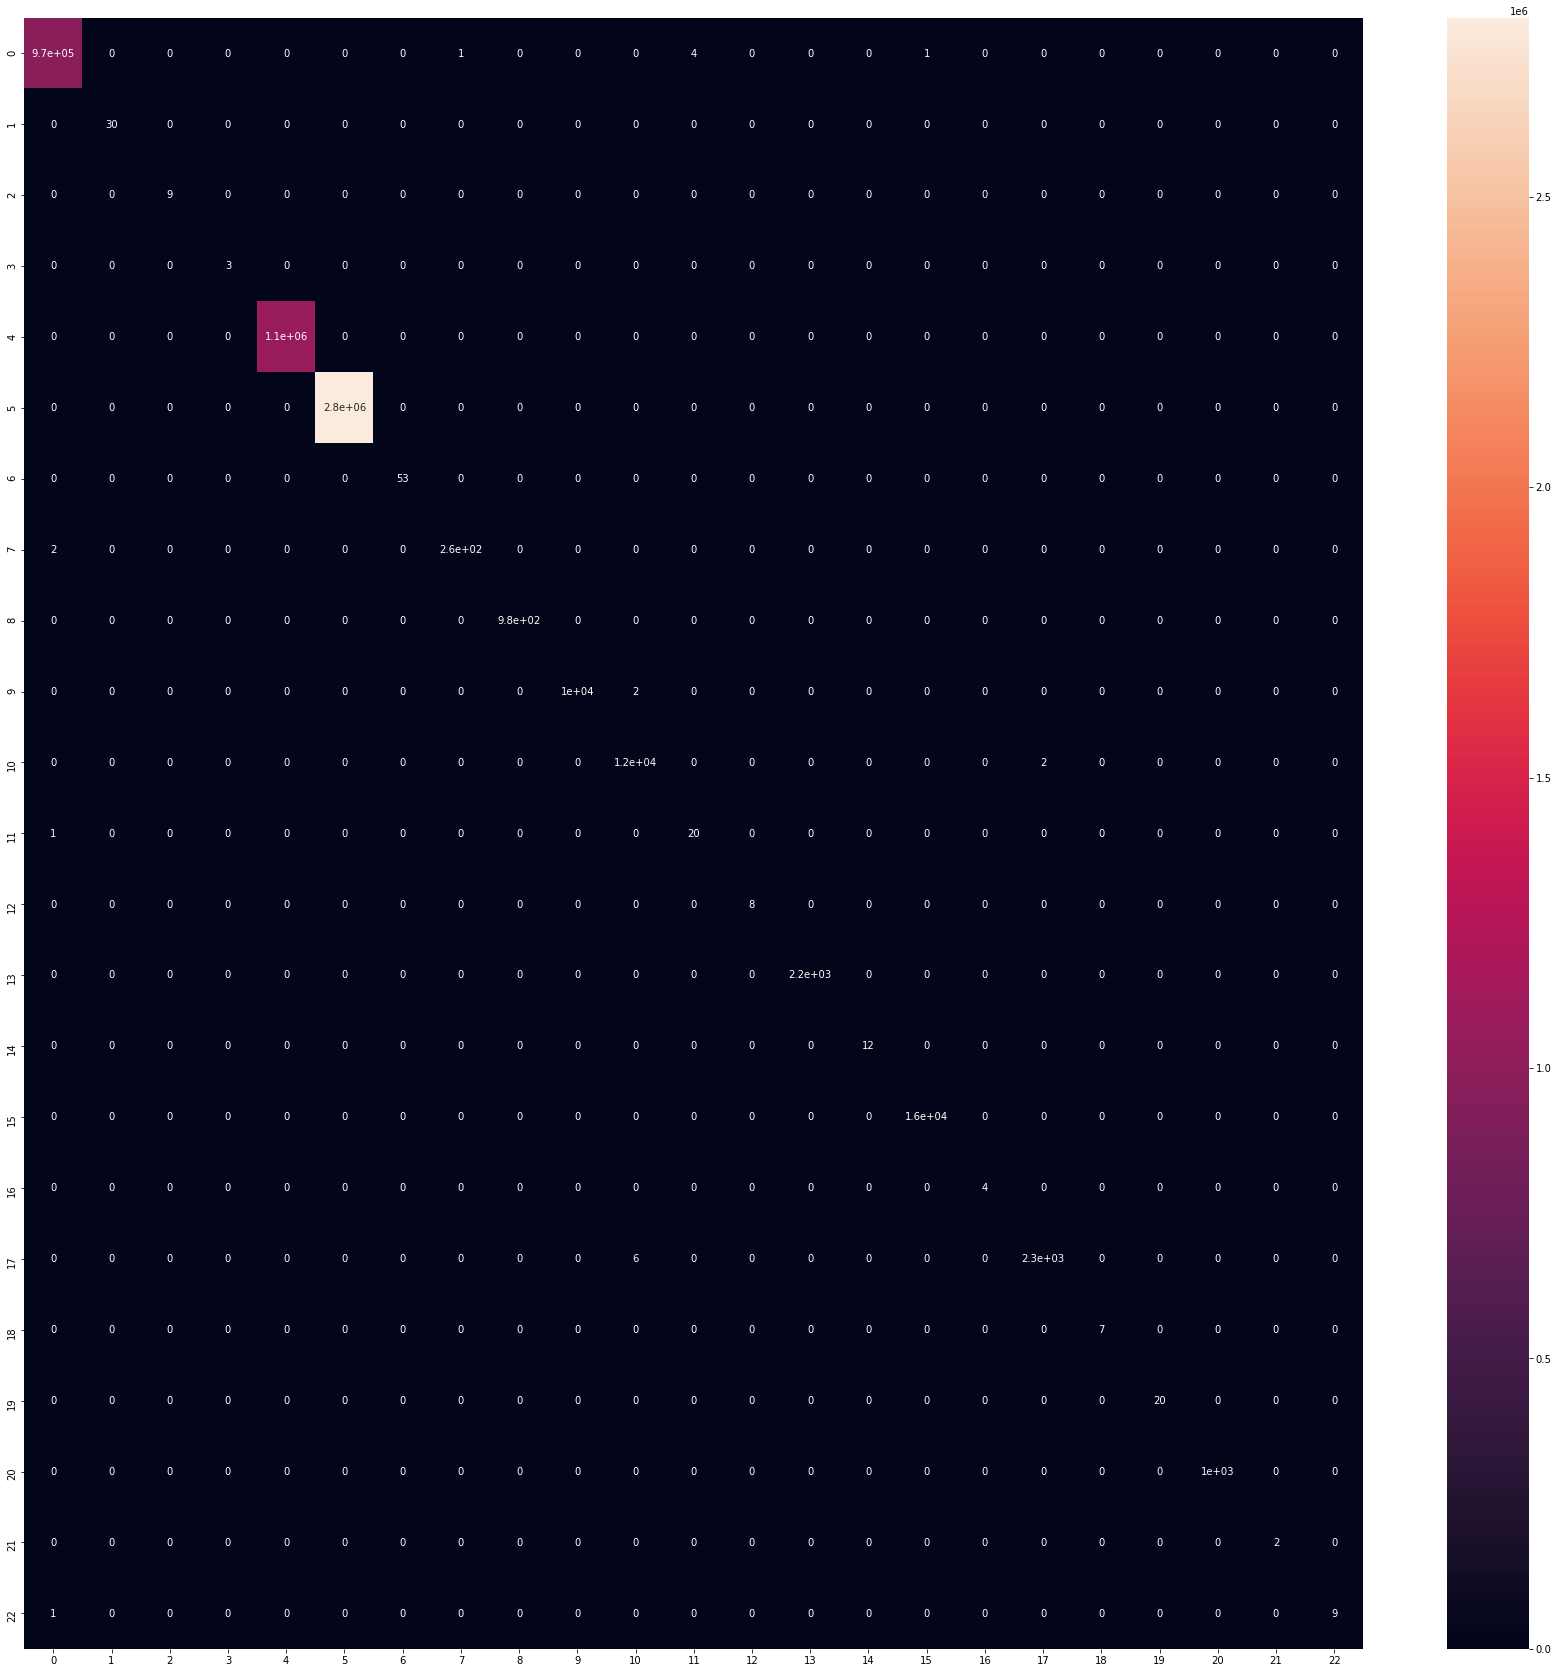

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in range(23)],
                  columns = [i for i in range(23)])
plt.figure(figsize = (30,30))
sn.heatmap(df_cm, annot=True)

## Load and Visualize Test Data

In [18]:
data = pd.read_csv('test.csv', header = None)
data.describe()

,0,4,5,6,7,8,9,10,11,12,...,31,32,33,34,35,36,37,38,39,40
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000763,0.000052,0.014678,0.002365,0.172478,0.011246,...,235.282681,199.193914,0.793494,0.024953,0.547921,0.004568,0.058766,0.058794,0.142659,0.141694
std,407.644400,1.276567e+05,1.612018e+04,0.005382,0.040369,0.009836,0.312069,0.049998,0.377795,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491962,0.035795,0.231298,0.233002,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing(Fill NULL values in service column with mode)

In [19]:
for i in range(41):
    if data[i].unique().dtype == object:
        data[i] = data[i].map(Dict[i])
data[2] = data[2].fillna(0)

In [20]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,311029.000000,311029.000000,311029.000000,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.146649,8.613052,1.134814,1.731702e+03,7.479937e+02,0.000029,0.000763,0.000052,0.014678,...,235.282681,199.193914,0.793494,0.024953,0.547921,0.004568,0.058766,0.058794,0.142659,0.141694
std,407.644400,0.944798,5.046769,2.301847,1.276567e+05,1.612018e+04,0.005382,0.040369,0.009836,0.312069,...,60.913298,100.306470,0.387090,0.096003,0.491962,0.035795,0.231298,0.233002,0.344380,0.346573
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,9.000000,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,12.000000,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,2.000000,68.000000,10.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Run prediction model to generate labels

In [21]:
data_np = (data.to_numpy()).astype(np.float)
X_test = data_np[:, 0:41]
print(X_test.shape)

(311029, 41)


In [22]:
y_test = clf.predict(X_test)
print(y_test.shape)

(311029,)


## Saving the model

In [23]:
import pickle
pickle.dump(clf, open('lda', 'wb'))

## Write labels in required CSV format for submission

In [24]:
import csv

with open("submission_4_20171077_20171083_20171104-20171165.csv", 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerow(['index', 'target'])
    idx = 0
    for i in y_test:
        res = ""
        for k in Dict[41].keys():
            if Dict[41][k] == i:
                res = k
                break
        
        if (X_test[idx][0] > 265 and X_test[idx][5] <= 688 and X_test[idx][21] == 1) or (X_test[idx][4] > 265616 and X_test[idx][4]<= 283618):
            csvwriter.writerow([idx, 'warezmaster.'])
        elif res == 'normal' and ((X_test[idx][0] > 265 and X_test[idx][1] == Dict[1]['tcp'] and \
              (X_test[idx][2] == Dict[2]['ftp_data'] or X_test[idx][2] == Dict[2]['ftp']) \
              and (X_test[idx][4] > 265616) and (X_test[idx][5] == 0)) or \
        (X_test[idx][1] == Dict[1]['tcp'] and (X_test[idx][2] == Dict[2]['ftp_data'] \
                                               or X_test[idx][2] == Dict[2]['ftp']) \
         and X_test[idx][9] > 0 and X_test[idx][9] <= 2 and X_test[idx][21] == 1)):
            csvwriter.writerow([idx, 'warezmaster.'])
        elif res == 'normal.' and X_test[idx][2] == Dict[2]['pop_3'] and X_test[idx][4] > 0 and (X_test[idx][5] / X_test[idx][4]) > 3:
            csvwriter.writerow([idx, 'guess_passwd.'])
        else:
            csvwriter.writerow([idx, res])
        idx += 1

## Some Heuristics which made our algorithms perform better than baseline results

- We checked for imbalance in the training dataset and employed several resampling strategies so that all classes are equally represented. Reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
- We found out that pop_3 mail servers are susceptible to password dictionary attack. Therefore, we used a heuristic that under normal conditions, if the service type is pop_3 and the ratio of destination bytes to source bytes is greater than an empirically decided threshold, there is a chance that a 'guess_password' attack is being tried.
- We use the following heuristics mentioned by Sabhnani et al in https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.101.2289&rep=rep1&type=pdf to handle warezmaster attack:

    Lemma 1: If during an FTP session, large amount is data is  sent  from  source  as  compared  to  destination then warezmaster attack can be concluded

    Lemma 2: If   a   guest   has   logged   in   through   an   FTP connection,  and  hidden  directories  are  created then warezmaster attack can be concluded
   
- The best performance was given by Random Forest Classifiers. This suggests that simple thresholding based rules maybe good enough for the purposes of Intrusion Detection